# Assignment
In this assignment, you continue working with the fashion MNIST dataset. Use the same sample of size 10000 with the previous checkpoint for the sake of comparability. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks below, and plan on discussing with your mentor. You can also take a look at these example solutions.

1. Load the dataset and make your preprocessing like normalizing the data.
2. Apply UMAP to the data.
3. Using the two-dimensional UMAP representation, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.
4. Do you think UMAP solution is satisfactory? Can you distinguish between different classes easily? Which one has done a better job: UMAP or the others (t-SNE or PCA) that you applied in the assignments of the previous checkpoints?
5. Now, play with the different hyperparameter values of the UMAP and apply UMAP for each of them. Which combination is the best in terms of the two-dimensional representation clarity?

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
import umap
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# #1
Load the dataset and make your preprocessing like normalizing the data.

In [2]:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [3]:
indices = np.random.choice(70000,10000)
X = mnist.data[indices]
y = mnist.target[indices]
X_std = StandardScaler().fit_transform(X)

# #2
Apply UMAP to the data.

In [4]:
X_umap = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

C:\Users\philb\Miniconda3\lib\site-packages\umap\nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\..\Miniconda3\lib\site-packages\umap\utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
C:\Users\philb\Miniconda3\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\..\Miniconda3\lib\si

# #3
Using the two-dimensional UMAP representation, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.

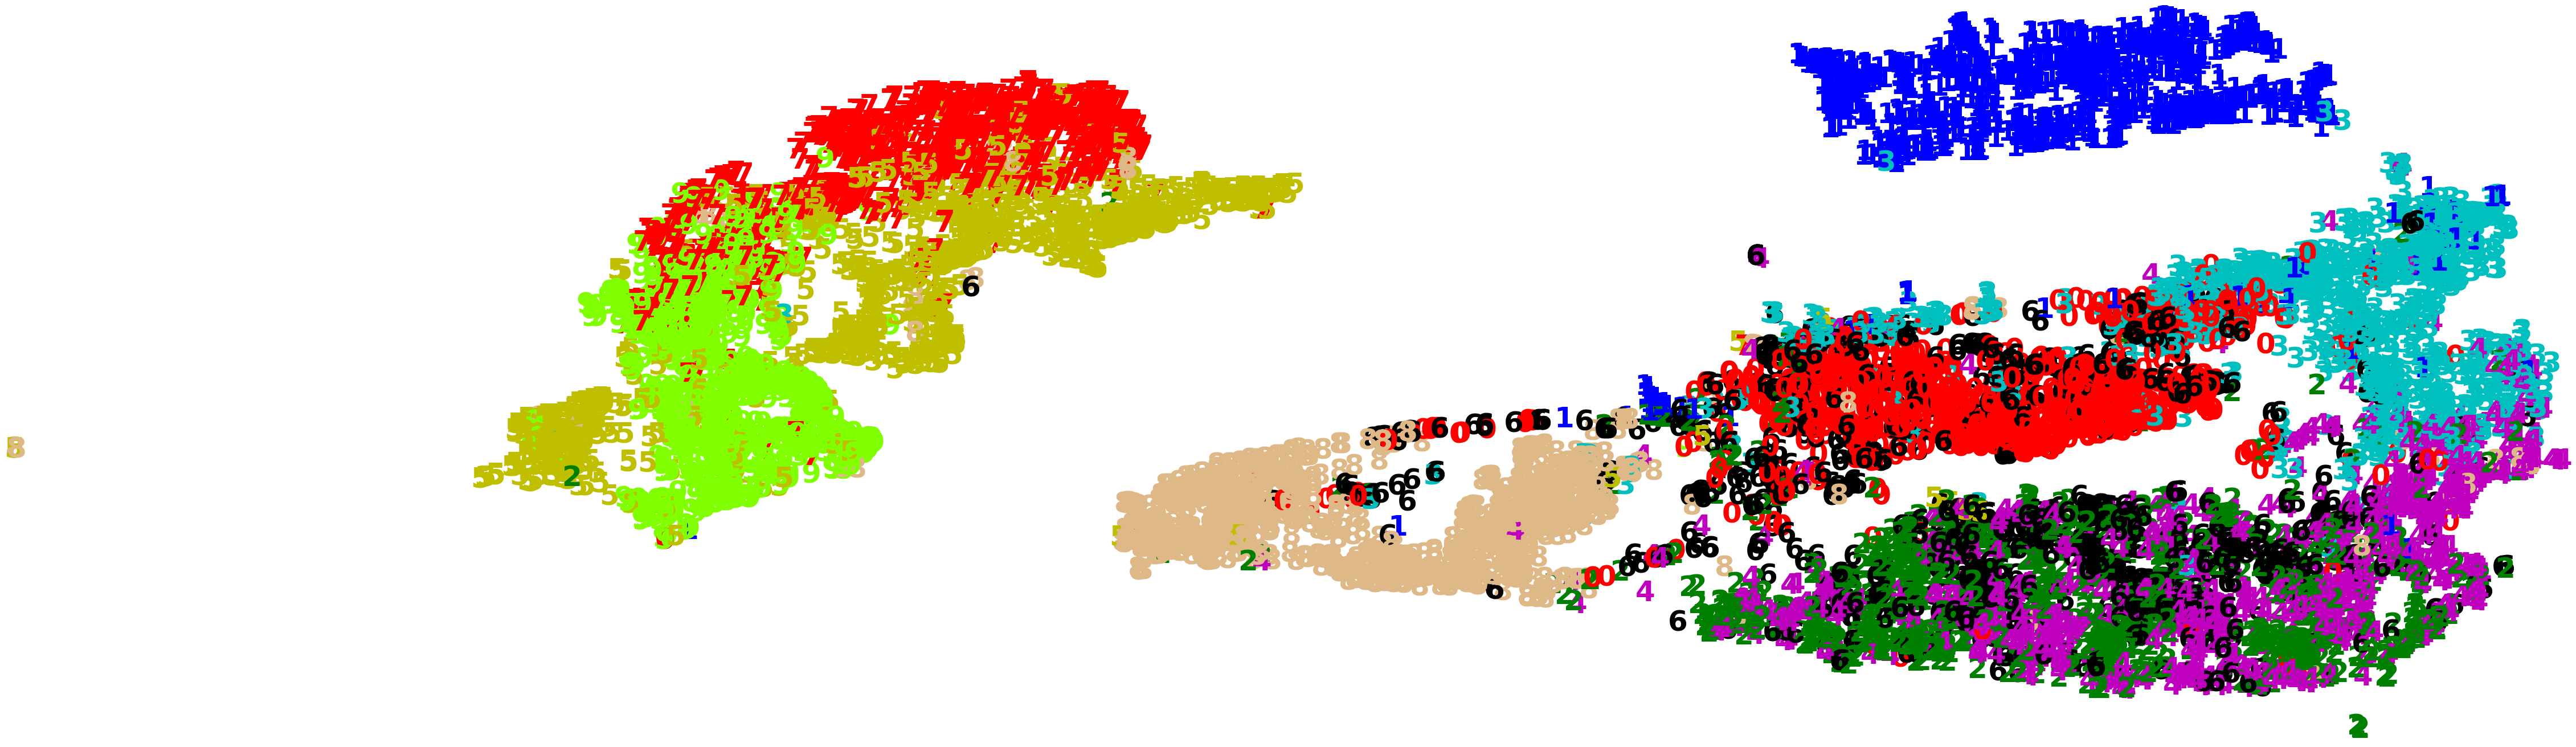

In [6]:
plt.figure(figsize=(3,1))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(X_umap.shape[0]):
    plt.text(X_umap[i, 0], X_umap[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

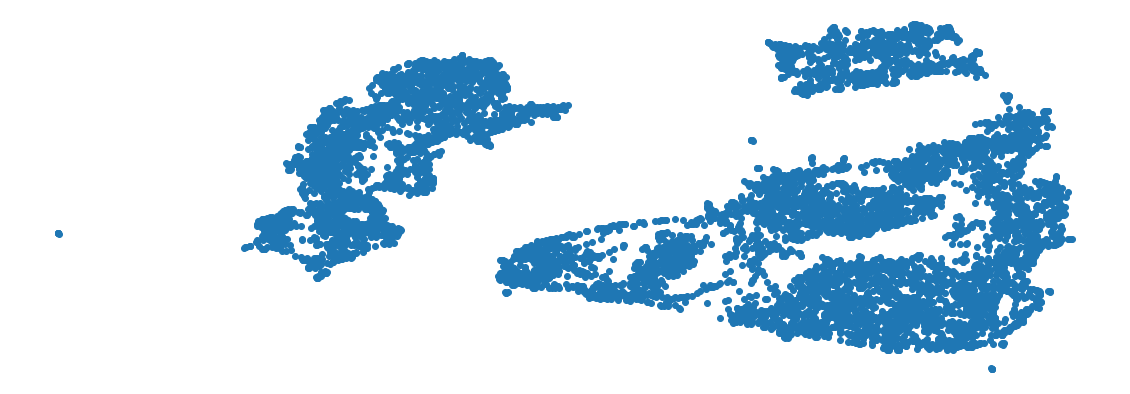

In [9]:
plt.figure(figsize=(20,7))
plt.scatter(X_umap[:, 0], X_umap[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# #4
Do you think UMAP solution is satisfactory? Can you distinguish between different classes easily? Which one has done a better job: UMAP or the others (t-SNE or PCA) that you applied in the assignments of the previous checkpoints?

Definitely better than PCA. You can differentiate maybe 8 groups relatively well. I would also say it performs better than t-SNE as the groups are more easily visually separated from one another.

# #5 
Now, play with the different hyperparameter values of the UMAP and apply UMAP for each of them. Which combination is the best in terms of the two-dimensional representation clarity?

In [10]:
X_umap = umap.UMAP().fit_transform(X_std)

C:\Users\philb\Miniconda3\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\..\Miniconda3\lib\site-packages\umap\rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
C:\Users\philb\Miniconda3\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\..\Miniconda3\lib\site-packages\umap\rp_tree.py", line 1

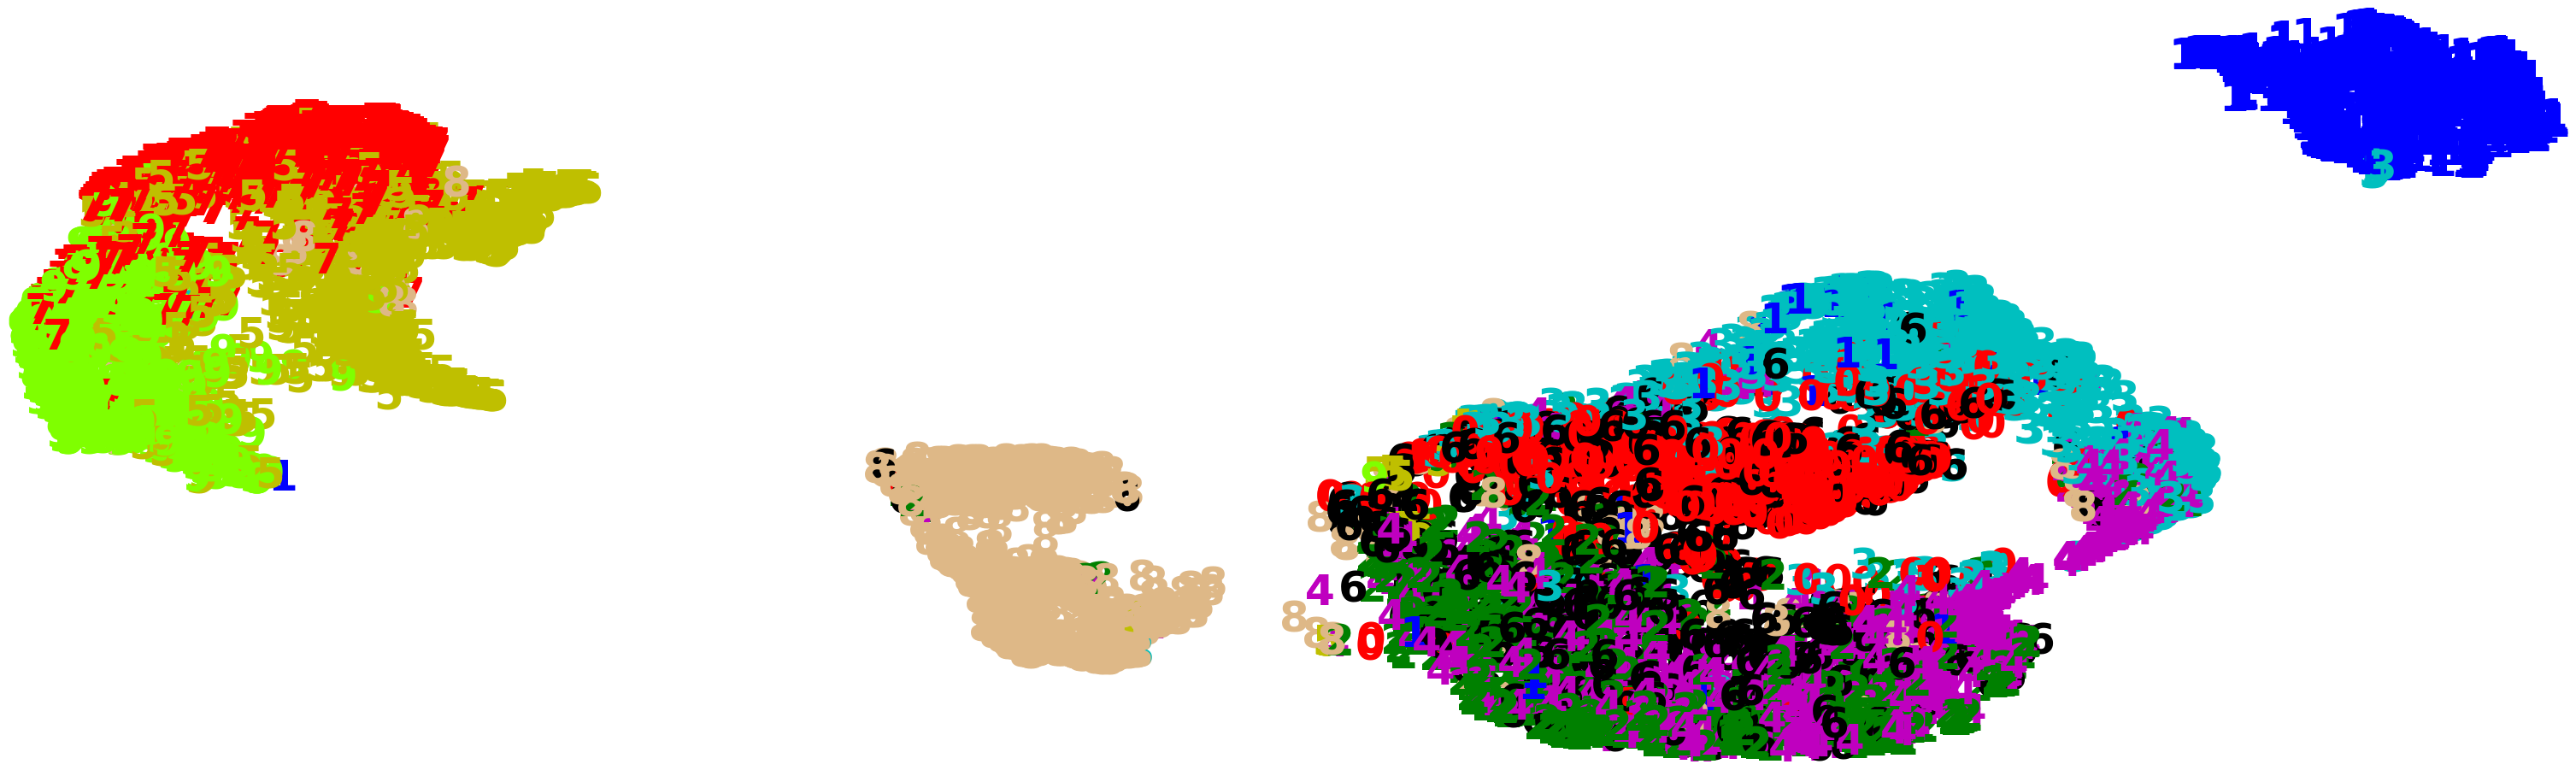

In [11]:
plt.figure(figsize=(3,1))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(X_umap.shape[0]):
    plt.text(X_umap[i, 0], X_umap[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

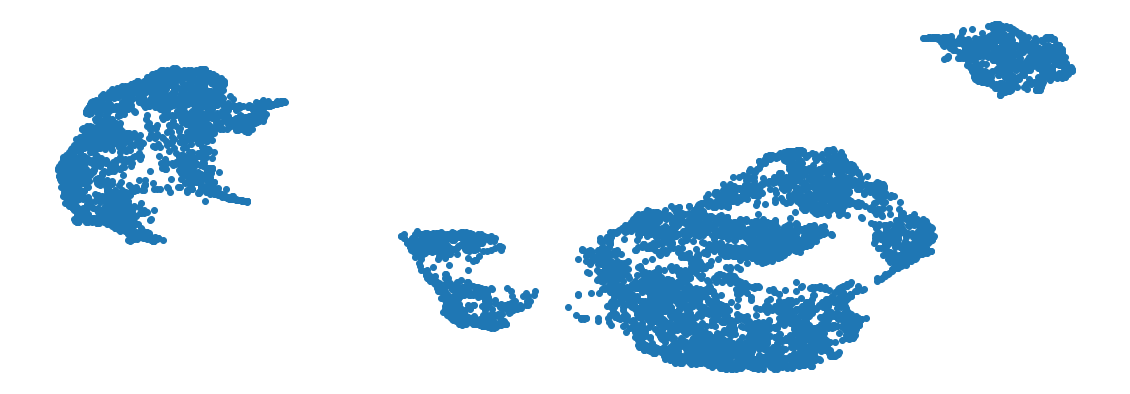

In [12]:
plt.figure(figsize=(20,7))
plt.scatter(X_umap[:, 0], X_umap[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [16]:
def do_umap(n_neighbors, metric, min_dist):
    X_umap = umap.UMAP(n_neighbors=n_neighbors, metric=metric, min_dist=min_dist).fit_transform(X_std)
    return X_umap

In [17]:
def do_label_graph():
    plt.figure(figsize=(3,1))
    colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
    for i in range(X_umap.shape[0]):
        plt.text(X_umap[i, 0], X_umap[i, 1], str(y[i]),
                 color=colours[int(y[i])],
                 fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

In [18]:
def do_unlabeled_graph():
    plt.figure(figsize=(20,7))
    plt.scatter(X_umap[:, 0], X_umap[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

In [19]:
def main(n_neighbors, metric, min_dist):
    print('n_neighbors={}, metric={}, min_dist={}'.format(n_neighbors, metric, min_dist))
    X_umap = do_umap(n_neighbors, metric, min_dist)
    print('Fitting done')
    do_label_graph()
    do_unlabeled_graph()

In [22]:
neighbor_range = [2, 5, 10, 15, 20, 35, 50, 75]
distances = [0.0, 0.1, 0.25, 0.5, 0.8, 0.99]
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'mahalanobis', 'wminkowski', 'seuclidean']

n_neighbors=2, metric=euclidean, min_dist=0.0
Fitting done


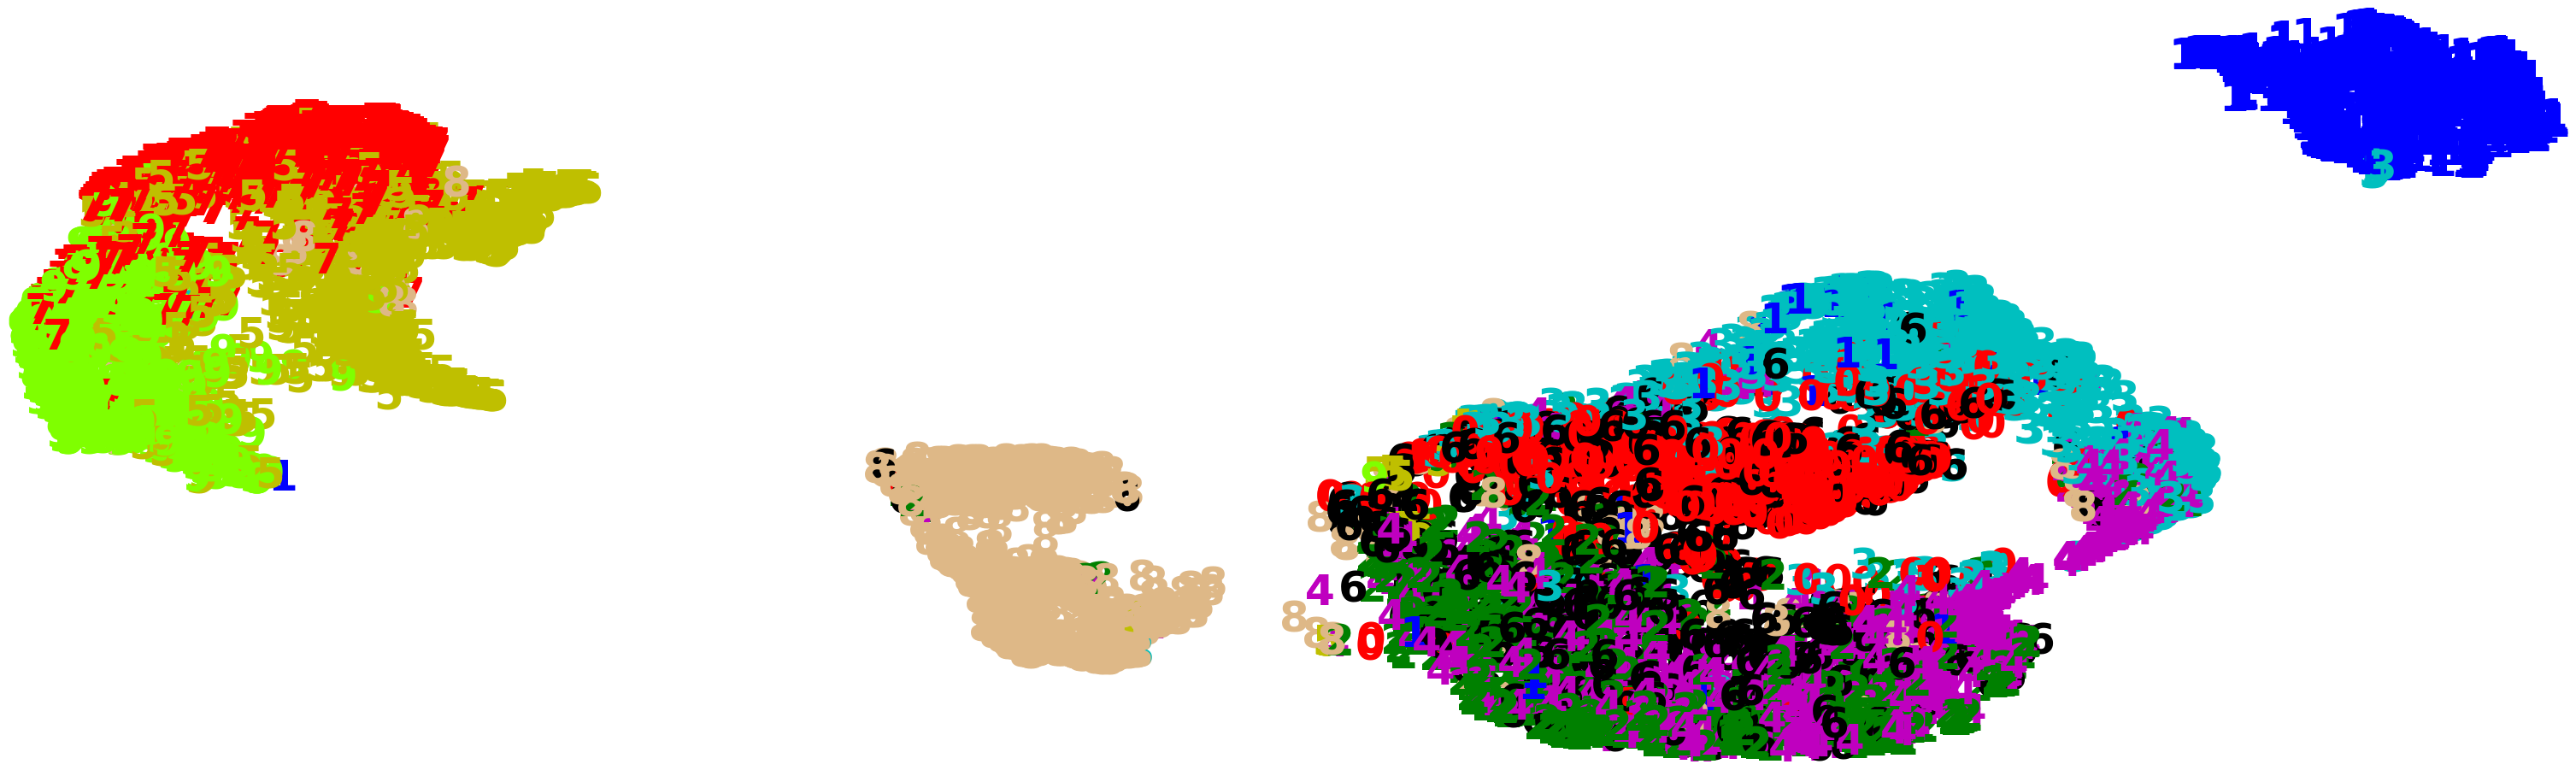

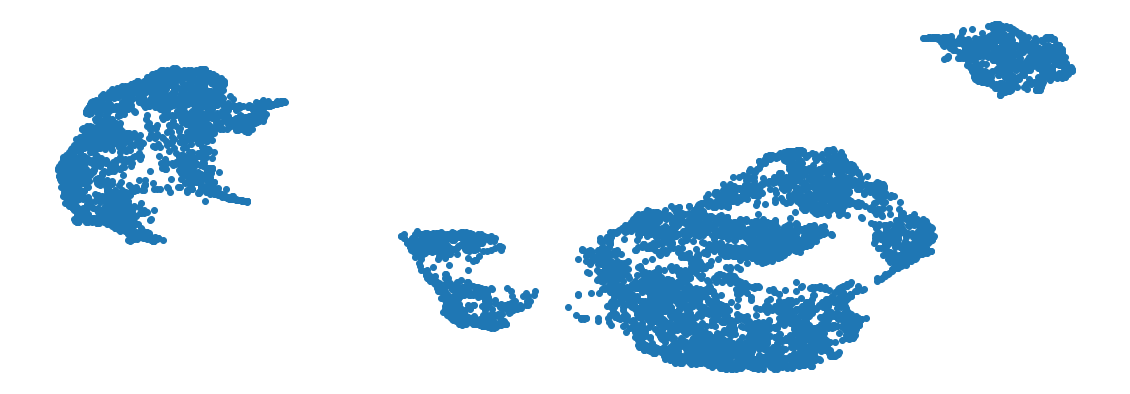

n_neighbors=2, metric=manhattan, min_dist=0.0
Fitting done


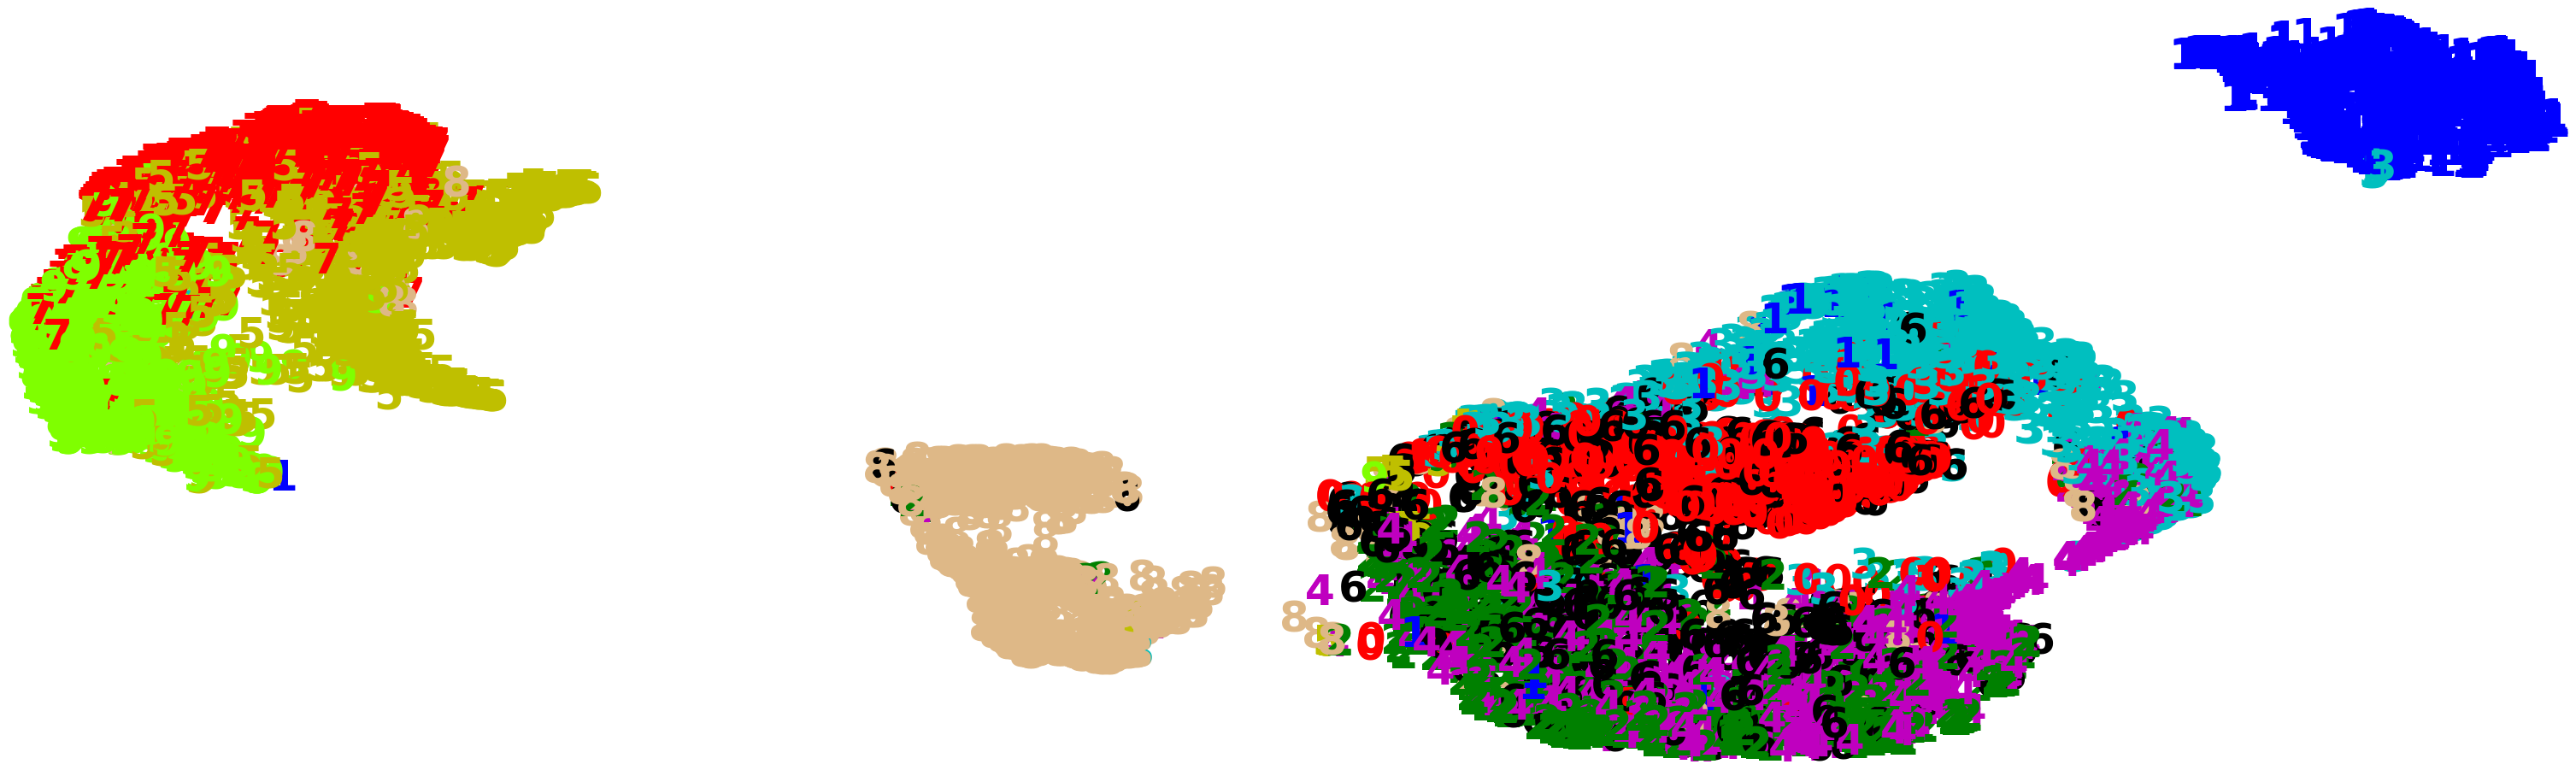

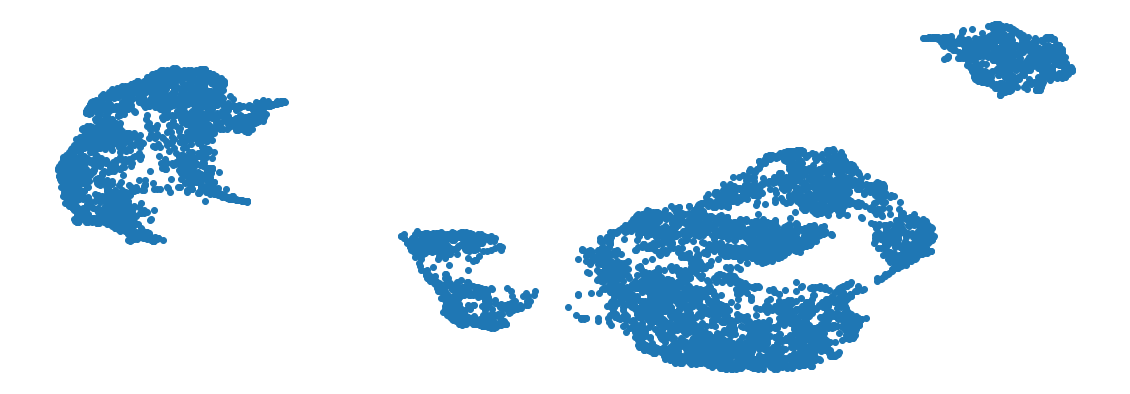

n_neighbors=2, metric=chebyshev, min_dist=0.0
Fitting done


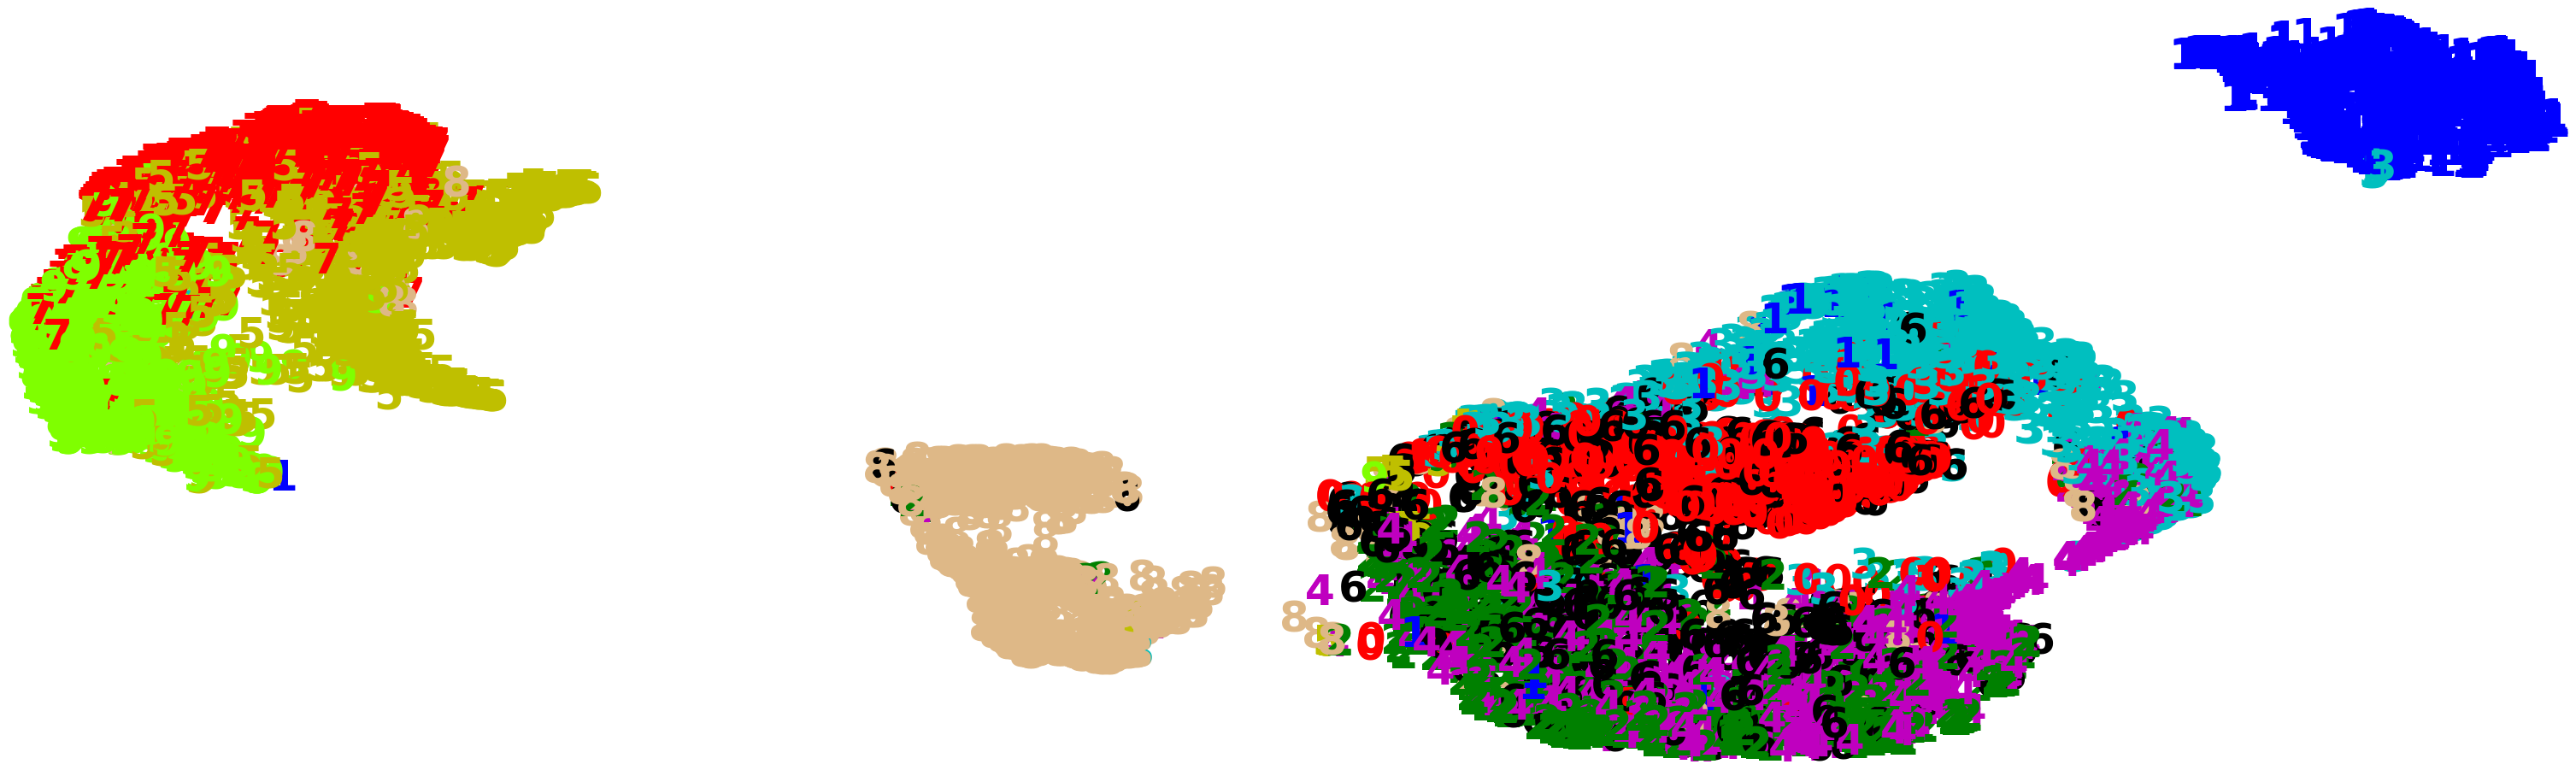

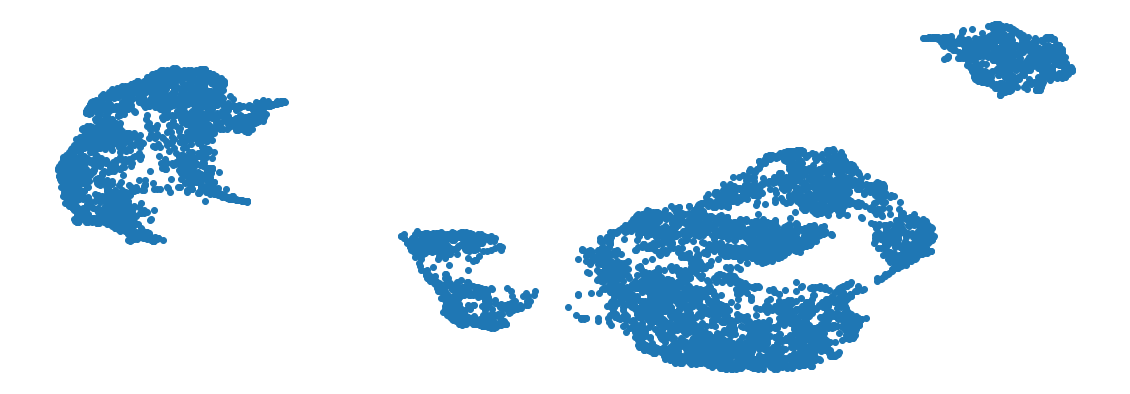

n_neighbors=2, metric=minkowski, min_dist=0.0
Fitting done


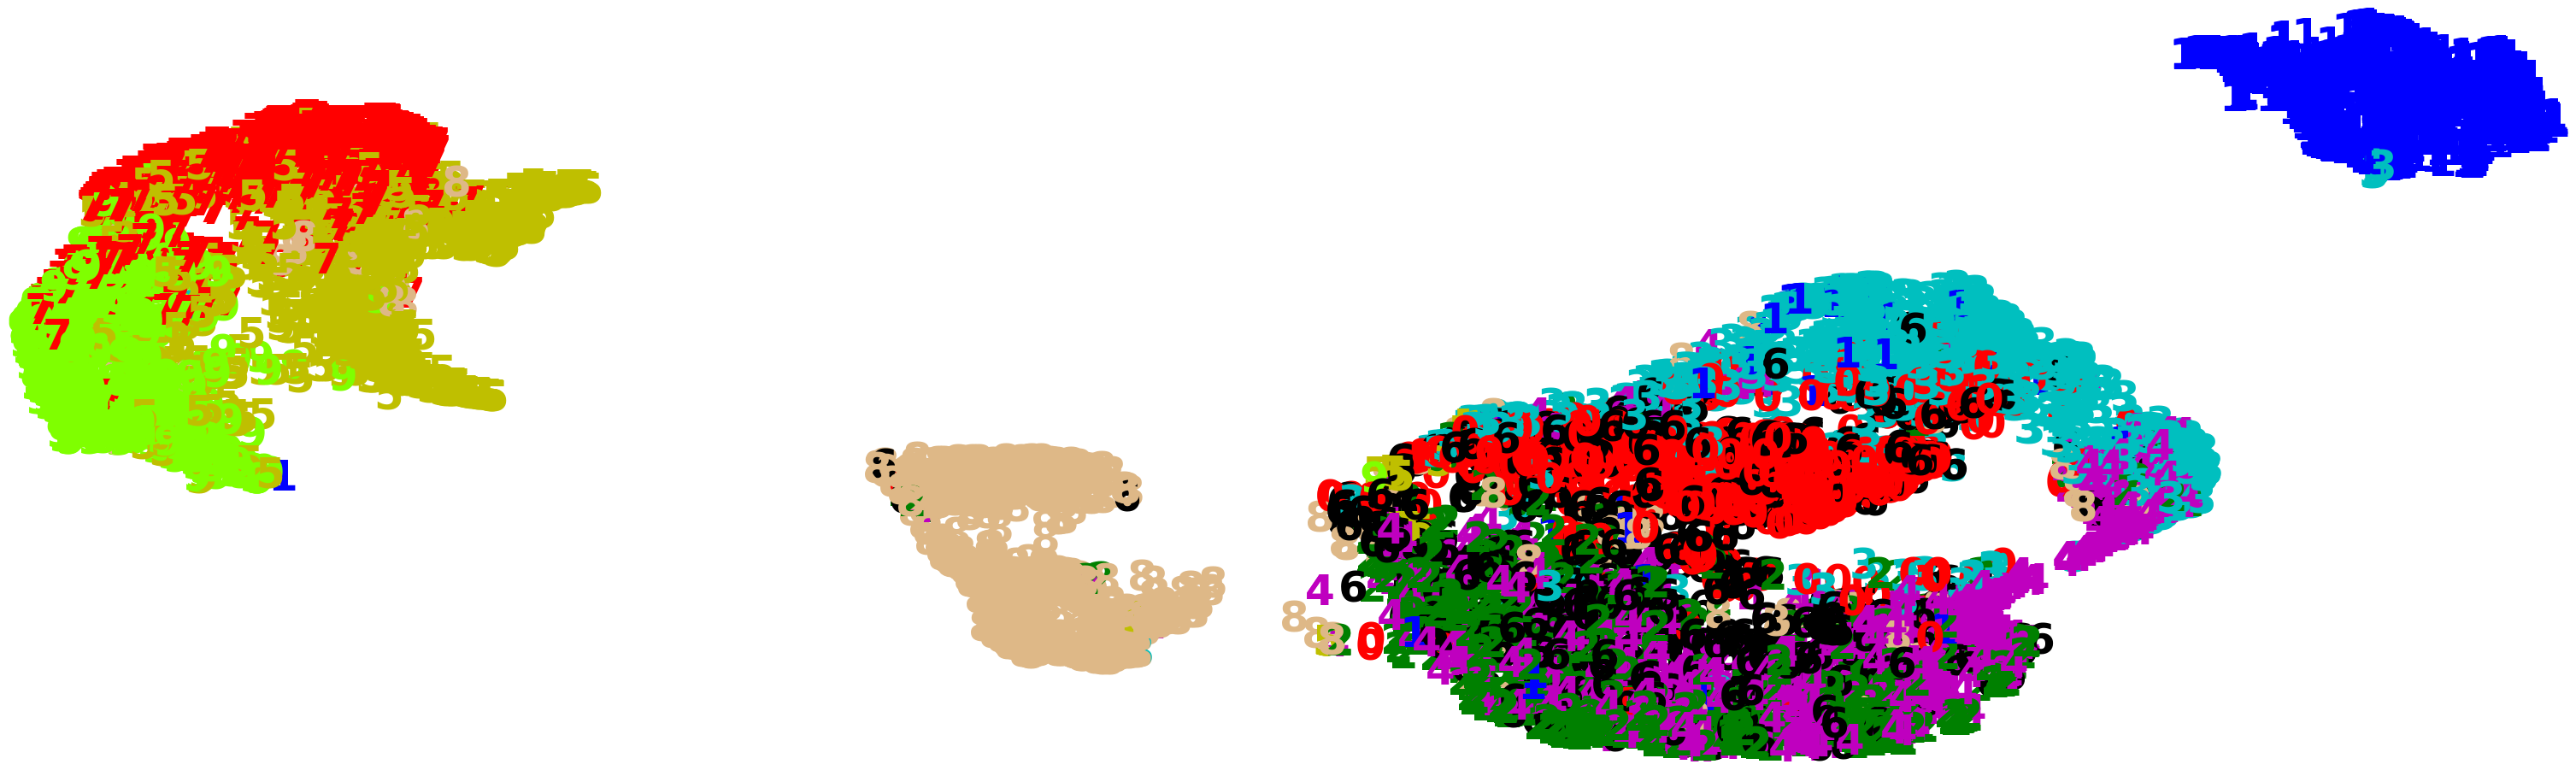

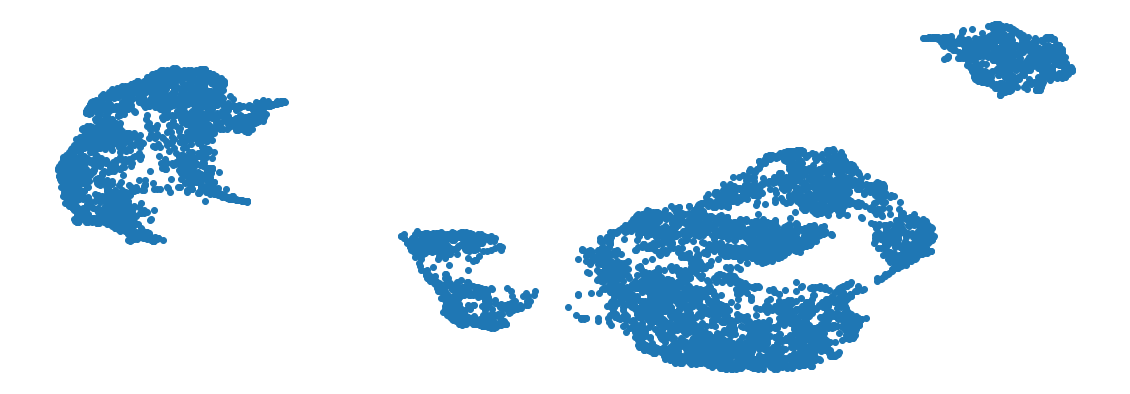

n_neighbors=2, metric=mahalanobis, min_dist=0.0


In [ ]:
%%time
for k in neighbor_range:
    for d in distances:
        for m in metrics:
            try:
                main(k, m, d)
            except:
                print('Did not work')

# GRAPHING LIKE THIS BREAKS MY KERNEL!!!